# DLCV hw1 r06946003 湯忠憲

# Problem1

<img src="p1.jpg">

# Problem2

In [1]:
from os import listdir
import imageio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
% matplotlib inline

In [2]:
# training & set name
train_set_name = [str(i)+"_"+str(j)+".png" for i in range(1,41) for j in range(1,7)]
test_set_name = [str(i)+"_"+str(j)+".png" for i in range(1,41) for j in range(7,11)]

In [3]:
train_X = [imageio.imread("hw1_dataset/"+n) for n in train_set_name]
train_X = np.array(train_X).reshape(240,-1)
train_y = [i for i in range(1,41) for _ in range(1,7)]

test_X = [imageio.imread("hw1_dataset/"+n) for n in test_set_name]
test_X = np.array(test_X).reshape(160,-1)
test_y = [i for i in range(1,41) for _ in range(7,11)]

# (a)

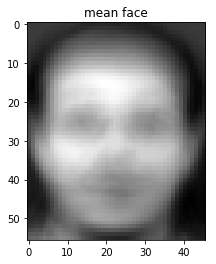

In [4]:
# mean face
mean_face_vector = train_X.mean(axis=0)
plt.title("mean face")
plt.imshow(mean_face_vector.reshape(56,46), cmap='gray')
plt.show()

In [5]:
# PCA and plot first three eigenfaces
pca = PCA()
output = pca.fit(train_X - mean_face_vector)
output.components_.shape

(240, 2576)

In [6]:
e1 = (output.components_[0]).reshape(56,46)
e2 = (output.components_[1]).reshape(56,46)
e3 = (output.components_[2]).reshape(56,46)

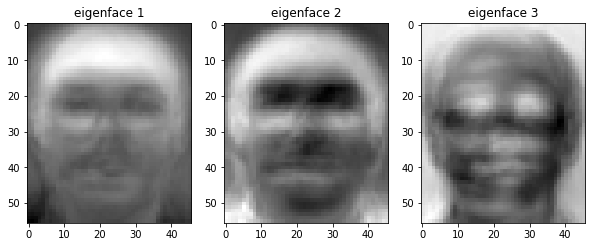

In [7]:
plt.figure(figsize=(10,6))
plt.subplot(131)
plt.imshow(e1,cmap='gray')
plt.title("eigenface 1")
plt.subplot(132)
plt.imshow(e2,cmap='gray')
plt.title("eigenface 2")
plt.subplot(133)
plt.imshow(e3,cmap='gray')
plt.title("eigenface 3")
plt.show()

# (b)

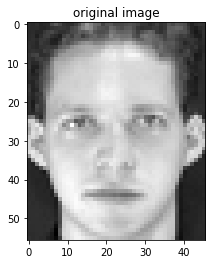

In [8]:
input_img = imageio.imread("hw1_dataset/1_1.png").reshape(1,-1)
plt.title("original image")
plt.imshow(input_img.reshape(56,46), cmap="gray")
plt.show()

In [9]:
projected = pca.transform(input_img - mean_face_vector)
print(projected.shape)

(1, 240)


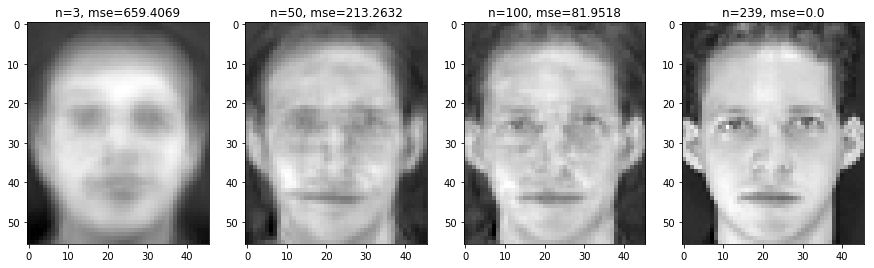

In [10]:
plt.figure(figsize=(15,6))

for j,i in enumerate([ 3, 50, 100, 239]):
    recon_f = (projected[:,:i] @ output.components_[:i]) + mean_face_vector
    mse = np.mean((recon_f - input_img)**2)
    plt.subplot(1,4,j+1)
    tit = "n="+str(i)+", mse="+str(np.round(mse,4))
    plt.title(tit)
    plt.imshow(recon_f.reshape(56,46), cmap = "gray")
plt.show()

# (c)

In [11]:
train_X_reduced = pca.transform(train_X - mean_face_vector)
knn = KNeighborsClassifier()
param_grid = {"n_neighbors":[1,3,5]}
clf = GridSearchCV(knn, param_grid, cv=3) # conduct 3-fold cross validation
print("         k=1         k=3         k=5")
for n in [3, 50, 159]:
    clf.fit(train_X_reduced[:,:n], train_y)
    print("n= %3d" %n, clf.cv_results_["mean_test_score"])

         k=1         k=3         k=5
n=   3 [ 0.70833333  0.5875      0.4875    ]
n=  50 [ 0.92916667  0.875       0.775     ]
n= 159 [ 0.925       0.87083333  0.74583333]


### From the above gridsearch output with 3-fold cross validation, we can find out the best parameters should be k=1 and n=50.

In [12]:
# real test 
test_X_reduced = pca.transform(test_X - mean_face_vector)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_X_reduced[:,:50], train_y)
pred_y = knn.predict(test_X_reduced[:,:50])

In [13]:
acc = accuracy_score(y_pred=pred_y, y_true=test_y)
print("The accuracy on testing set:", acc)

The accuracy on testing set: 0.9625


# Bonux

<img src="p2.jpg">